In [1]:
#Obliczenia  i analiza  danych
import numpy as np
import pandas as pd

#wizualiacja 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette('icefire_r', 2)
import warnings

%matplotlib inline
#Przetwarzanie

from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import KNNImputer
# Baza danych gównych do nauki modelu
train = pd.read_csv("train.csv") 
# Baza danych Titanica do sprawdzenia modelu
test = pd.read_csv("test.csv")

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing_values_per_column = train.isnull().sum()
print(missing_values_per_column.to_string(index=True))

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
object_columns = train.select_dtypes(include='object').columns
numerical_columns = train.select_dtypes(exclude='object').columns
print(object_columns)
print(numerical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 

In [5]:
object_values = train.loc[:, object_columns]
object_values.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Ordinal encoding

In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
Enc_col = object_columns

categories = {}
for col in Enc_col:
    for df in [train, test]:
        df[col + '_Enc'] = enc.fit_transform(df[col].values.reshape(-1, 1))
    categories[col] = enc.categories_[0]  # Store categories for the current column

# Print the mapping
for col in Enc_col:
    print(f"Kolumna: {col}")
    for i, category in enumerate(categories[col]):
        print(f"  Wartość zakodowana: {i} -> Wartość początkowa: {category}")

Kolumna: MSZoning
  Wartość zakodowana: 0 -> Wartość początkowa: C (all)
  Wartość zakodowana: 1 -> Wartość początkowa: FV
  Wartość zakodowana: 2 -> Wartość początkowa: RH
  Wartość zakodowana: 3 -> Wartość początkowa: RL
  Wartość zakodowana: 4 -> Wartość początkowa: RM
  Wartość zakodowana: 5 -> Wartość początkowa: nan
Kolumna: Street
  Wartość zakodowana: 0 -> Wartość początkowa: Grvl
  Wartość zakodowana: 1 -> Wartość początkowa: Pave
Kolumna: Alley
  Wartość zakodowana: 0 -> Wartość początkowa: Grvl
  Wartość zakodowana: 1 -> Wartość początkowa: Pave
  Wartość zakodowana: 2 -> Wartość początkowa: nan
Kolumna: LotShape
  Wartość zakodowana: 0 -> Wartość początkowa: IR1
  Wartość zakodowana: 1 -> Wartość początkowa: IR2
  Wartość zakodowana: 2 -> Wartość początkowa: IR3
  Wartość zakodowana: 3 -> Wartość początkowa: Reg
Kolumna: LandContour
  Wartość zakodowana: 0 -> Wartość początkowa: Bnk
  Wartość zakodowana: 1 -> Wartość początkowa: HLS
  Wartość zakodowana: 2 -> Wartość począt

In [7]:
#### Usnięcie koluumn, które zostały zancodowane.
object_columns = train.select_dtypes(include='object').columns
for df in [train, test]:
     df.drop(columns=object_columns, inplace=True)

#### KNN Inputer

In [8]:
def fill_missing_values(df, column_to_exclude='SalePrice'):
 # Exclude the specified column from imputation
    cols_to_impute = [col for col in df.columns if col != column_to_exclude and df[col].isna().any()]

    # Create KNN Imputer with 5 neighbors
    imputer = KNNImputer(n_neighbors=6)

    # Impute values in the selected columns
    df_imputed = df[cols_to_impute].copy()  # Avoid modifying original DataFrame
    df_imputed = imputer.fit_transform(df_imputed)

    # Assign imputed values back to the selected columns in the original DataFrame
    df[cols_to_impute] = df_imputed

    # Return the imputed DataFrame and original column order (excluding the excluded column)
    return df, [col for col in df.columns if col != column_to_exclude]

# Combine train and test DataFrames (assuming 'Transported' is a string column)
combined_df = pd.concat([train, test], ignore_index=True)

# Impute missing values in the combined DataFrame
combined_df_imputed, cols_without_excluded = fill_missing_values(combined_df)

# Split the imputed DataFrame back to train and test
train_imputed = combined_df_imputed.iloc[:len(train)]
test_imputed = combined_df_imputed.iloc[len(train):]

# Restore original column order for train and test
train = train_imputed[cols_without_excluded].assign(SalePrice=train['SalePrice'])  # Assign 'Transported' back to train
test = test_imputed[cols_without_excluded]

# Check for missing values after imputation
missing_values_per_column = train.isnull().sum()
print(missing_values_per_column.to_string(index=True))

Id                   0
MSSubClass           0
LotFrontage          0
LotArea              0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
MasVnrArea           0
BsmtFinSF1           0
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea            0
BsmtFullBath         0
BsmtHalfBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenAbvGr         0
TotRmsAbvGrd         0
Fireplaces           0
GarageYrBlt          0
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
MoSold               0
YrSold               0
MSZoning_Enc         0
Street_Enc           0
Alley_Enc            0
LotShape_Enc         0
LandContour_Enc      0
Utilities_Enc        0
LotConfig_E

## Wizulaizacja

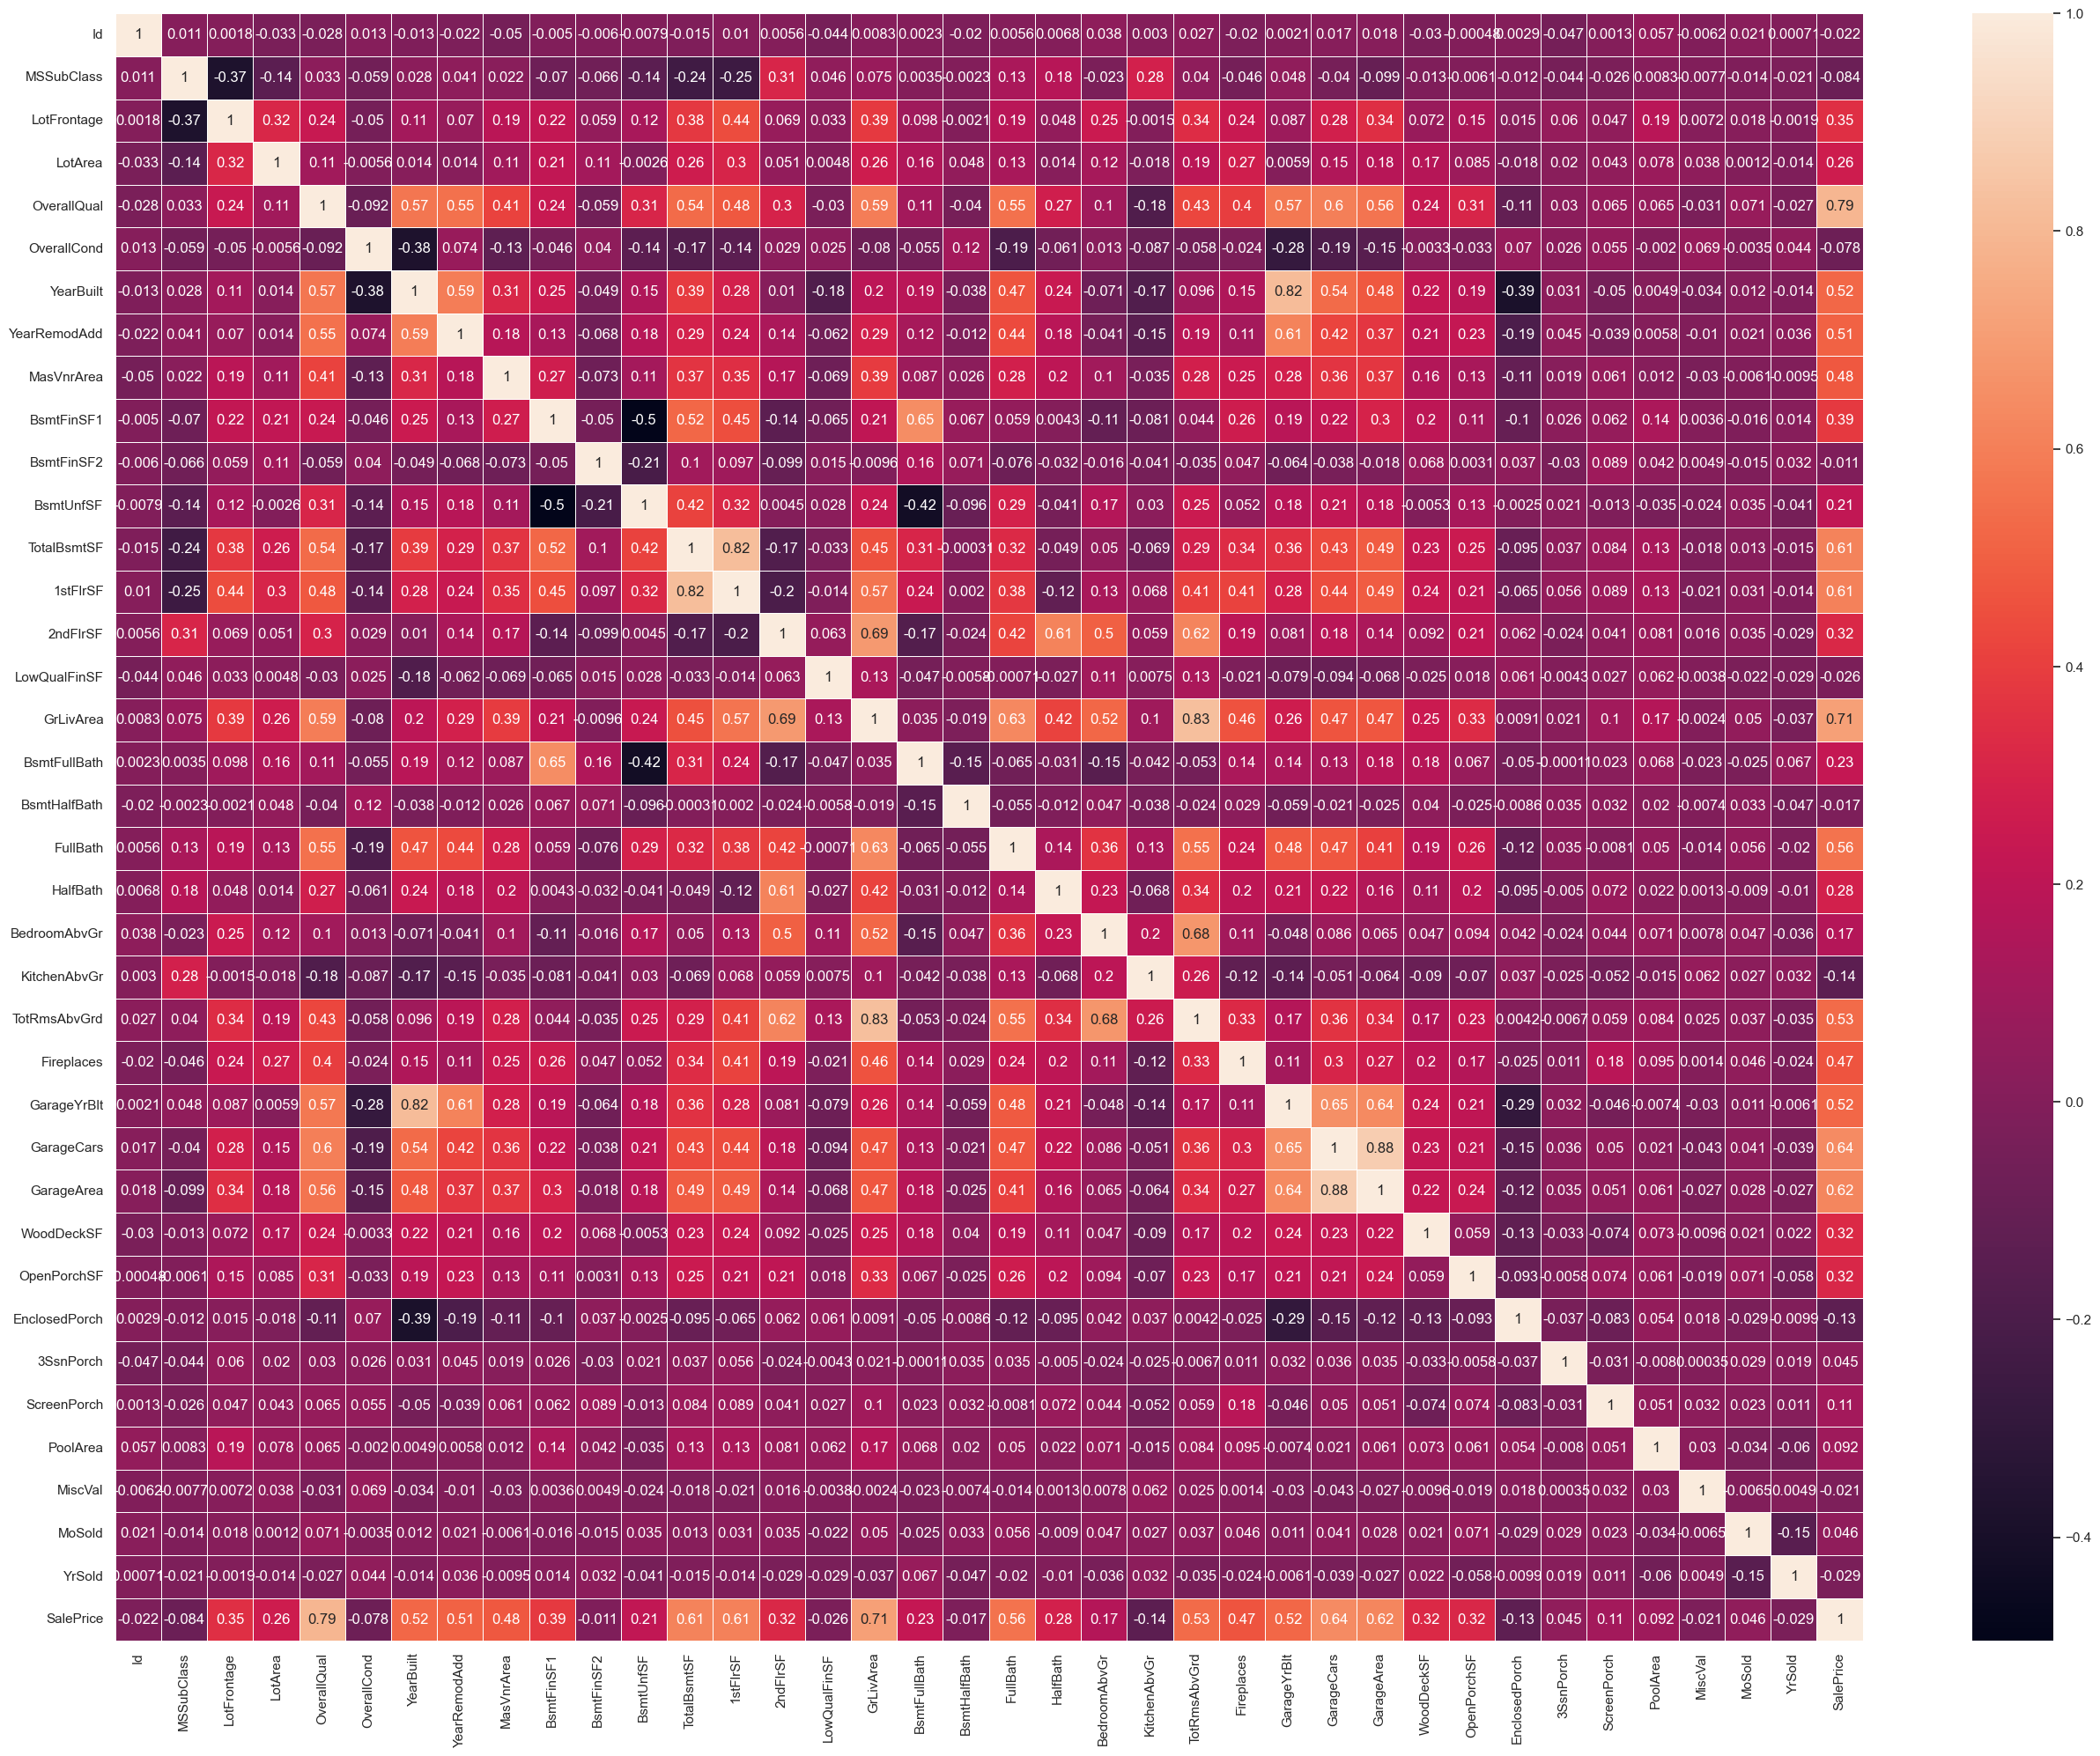

In [9]:
numerical_values = train.loc[:, numerical_columns]
numerical_values.head()

correlation_matrix = numerical_values.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True,  linewidths=0.5)
plt.show()

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

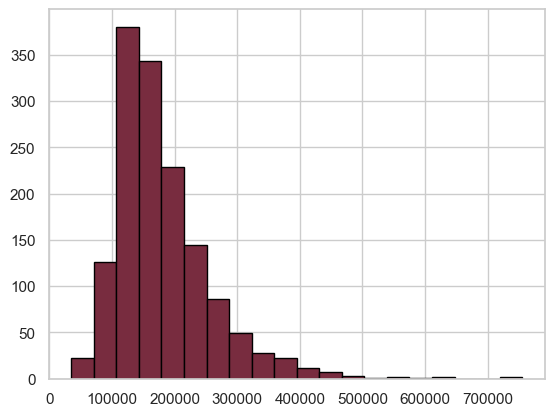

In [10]:
plt.hist(train['SalePrice'], edgecolor='black', bins=20)